<a href="https://colab.research.google.com/github/IshaqKHATTAK/Natural-Language-Processing/blob/main/movie_centiment_analysis_preprocessing_classificat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


In [ ]:
# for train test split
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Supervised learning algorithms  
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Text preprocessing

Normally any NLP task involves following text cleaning techniques -

1. Removal of HTML contents like "< br>".

2. Removal of punctutions, special characters like '\'.

3. Removal of stopwords like is, the which do not offer much insight.

4. Stemming/Lemmatization to bring back multiple forms of same word to their common root like 'coming', 'comes' into 'come'.

5. Vectorization - Encode the numeric values once you have cleaned it.

6. Fit the data to the ML model.


**reading data**

In [ ]:
df = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')
df.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


**convert to lower case**

In [ ]:
#Convert to lower
df['review'] = df['review'].str.lower()

**remove all html tags**

In [ ]:
#Remove the html tags
import re

def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

In [ ]:
df['review'] = df['review'].apply(remove_html_tags)

In [ ]:
df['review'].head(5)

0    one of the other reviewers has mentioned that ...
1    a wonderful little production. the filming tec...
2    i thought this was a wonderful way to spend ti...
3    basically there's a family where a little boy ...
4    petter mattei's "love in the time of money" is...
Name: review, dtype: object

**remove all URLs**

In [ ]:
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)

In [ ]:
df['review'] = df['review'].apply(remove_url)

In [ ]:
df.head(5)

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


**remove punctuations**

In [ ]:
import string,time
exclude = string.punctuation

In [ ]:
def remove_punc(text):
    for char in exclude:
        text = text.replace(char,'')
    return text

In [ ]:
def remove_punc1(text):
    return text.translate(str.maketrans('', '', exclude))

In [ ]:
df['review'] = df['review'].apply(remove_punc1)

**Short chating words**

In [ ]:
chat_words_str = """
AFAIK=As Far As I Know
AFK=Away From Keyboard
ASAP=As Soon As Possible
ATK=At The Keyboard
ATM=At The Moment
A3=Anytime, Anywhere, Anyplace
BAK=Back At Keyboard
BBL=Be Back Later
BBS=Be Back Soon
BFN=Bye For Now
B4N=Bye For Now
BRB=Be Right Back
BRT=Be Right There
BTW=By The Way
B4=Before
B4N=Bye For Now
CU=See You
CUL8R=See You Later
CYA=See You
FAQ=Frequently Asked Questions
FC=Fingers Crossed
FWIW=For What It's Worth
FYI=For Your Information
GAL=Get A Life
GG=Good Game
GN=Good Night
GMTA=Great Minds Think Alike
GR8=Great!
G9=Genius
IC=I See
ICQ=I Seek you (also a chat program)
ILU=ILU: I Love You
IMHO=In My Honest/Humble Opinion
IMO=In My Opinion
IOW=In Other Words
IRL=In Real Life
KISS=Keep It Simple, Stupid
LDR=Long Distance Relationship
LMAO=Laugh My A.. Off
LOL=Laughing Out Loud
LTNS=Long Time No See
L8R=Later
MTE=My Thoughts Exactly
M8=Mate
NRN=No Reply Necessary
OIC=Oh I See
PITA=Pain In The A..
PRT=Party
PRW=Parents Are Watching
ROFL=Rolling On The Floor Laughing
ROFLOL=Rolling On The Floor Laughing Out Loud
ROTFLMAO=Rolling On The Floor Laughing My A.. Off
SK8=Skate
STATS=Your sex and age
ASL=Age, Sex, Location
THX=Thank You
TTFN=Ta-Ta For Now!
TTYL=Talk To You Later
U=You
U2=You Too
U4E=Yours For Ever
WB=Welcome Back
WTF=What The F...
WTG=Way To Go!
WUF=Where Are You From?
W8=Wait...
7K=Sick:-D Laugher
"""

In [ ]:
chat_words_list = []
chat_words_map_dict = {}
for line in chat_words_str.split("\n"):
    if line != "":
        cw = line.split("=")[0]
        cw_expanded = line.split("=")[1]
        chat_words_list.append(cw)
        chat_words_map_dict[cw] = cw_expanded
chat_words_list = set(chat_words_list)

In [ ]:
def chat_words_conversion(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

In [ ]:
df['review'] = df['review'].apply(chat_words_conversion)

**Stop word removal**

In [ ]:
from nltk.corpus import stopwords

In [ ]:
def remove_stopwords(text):
    new_text = []
    
    for word in text.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return " ".join(x)

In [ ]:
df['review'] = df['review'].apply(remove_stopwords)

**tokenization**

In [ ]:
from nltk.tokenize import word_tokenize,sent_tokenize

In [ ]:
df['review'] = df['review'].apply(word_tokenize)

**stemming **

In [ ]:
from nltk.stem.porter import PorterStemmer

In [ ]:
ps = PorterStemmer()
def stem_words(text):
    return " ".join([ps.stem(word) for word in text.split()])

In [ ]:
df['review'] = df['review'].apply(stem_words)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(df['review'].values,
                                                     df['sentiment'].values,test_size=0.2,
                                                     random_state=42,stratify=df['sentiment'].values)

In [ ]:
tfidf_vectorizer = TfidfVectorizer() 

tfidf_train_vectors = tfidf_vectorizer.fit_transform(X_train)

tfidf_test_vectors = tfidf_vectorizer.transform(X_test)

In [ ]:
from sklearn.metrics import classification_report

classifier1 = RandomForestClassifier()
classifier1.fit(tfidf_train_vectors,y_train)

y_pred1 = classifier1.predict(tfidf_test_vectors)

print(classification_report(y_test,y_pred1))


              precision    recall  f1-score   support

    negative       0.84      0.85      0.85      5000
    positive       0.85      0.84      0.85      5000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



NameError: name 'accuracy_score' is not defined

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy score:", accuracy_score(y_test,y_pred1))

Accuracy score: 0.8472


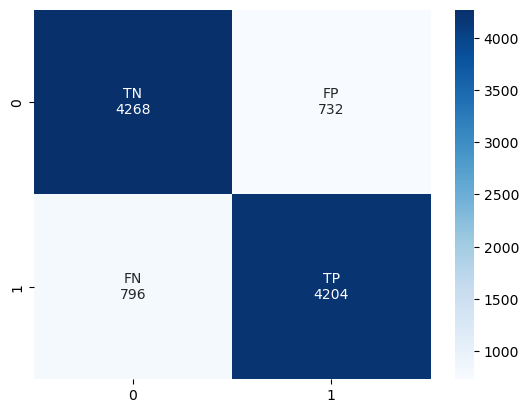

In [ ]:
# generate confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cnf_matrix = confusion_matrix(y_test,y_pred1)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues');

In [ ]:
classifier2 = DecisionTreeClassifier()
classifier2.fit(tfidf_train_vectors,y_train)

y_pred2 = classifier2.predict(tfidf_test_vectors)

print(classification_report(y_test,y_pred2))
print("Accuracy score:", accuracy_score(y_test,y_pred2))

              precision    recall  f1-score   support

    negative       0.72      0.70      0.71      5000
    positive       0.71      0.72      0.72      5000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000

Accuracy score: 0.7146


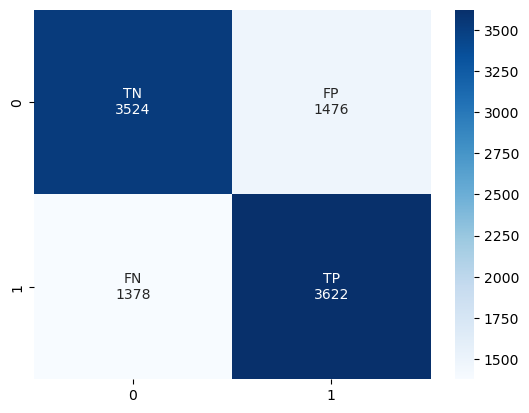

In [ ]:
# generate confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred2)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in cnf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='Blues');